# Example from Maravelias and Grossmann, 2003

This is a tiny example in the appendix of a paper by Maravelias and Grossman, 2003. The example provides a simple demonstration of translating a STN diagram into the model that can be solved by the STN Scheduler.

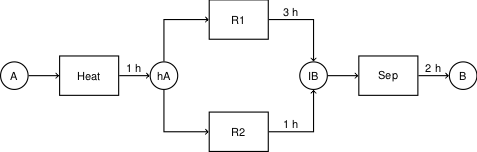

In [1]:
from IPython.display import Image
Image('../images/MarveliasGrossman2003a.png')

### Problem Data

| task/unit | duration (h) | max batch size (kg) |
| :- | :-: | :-: |
|heater/reactor | 1 | 10 |
|R1/reactor 1 | 3 | 4 |
|R2/reactor 2 | 1 | 2 |
|sep/filter   | 2 | 10 |

### Reference

Maravelias, C. T., and Grossmann 2003). New General Continuous-Time State−Task Network Formulation for Short-Term Scheduling of Multipurpose Batch Plants. Industrial & Engineering Chemistry Research, 42 (13), 3056-3074.

In [2]:
%matplotlib inline

import sys
sys.path.append('../STN')
from STN import STN

In [3]:
# create an empty STN instance
stn = STN()

# enter any states where there are finite capacity constraints, 
# initial inventory, or with an associated price. In this problem
# we're trying to maximize the production of product B, so we
# an arbitrary value for B, and no price for any other state.

# states with an initial inventory
stn.state('A', init = 100)

# price data for product states
stn.state('B', price = 10)

# state -> task arcs
stn.stArc('A',  'Heat')
stn.stArc('hA', 'R1')
stn.stArc('hA', 'R2')
stn.stArc('IB', 'Sep')

# task -> state arcs with durations
stn.tsArc('Heat', 'hA', dur = 1)
stn.tsArc('R1',   'IB', dur = 3)
stn.tsArc('R2',   'IB', dur = 1)
stn.tsArc('Sep',  'B',  dur = 2)

# unit/task data
stn.unit('Heater',   'Heat', Bmax = 10)
stn.unit('Reactor1', 'R1',   Bmax =  4)
stn.unit('Reactor2', 'R2',   Bmax =  2)
stn.unit('Filter',   'Sep',  Bmax = 10)

# choose a time horizon, then build and solve model
H = 6
stn.build(range(0,H+1))
stn.solve()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 100.0
  Upper bound: 100.0
  Number of objectives: 1
  Number of constraints: 171
  Number of variables: 115
  Number of nonzeros: 363
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.013355016708374023
# ----------------------------------------------------------
#   Solution Information
# ------------------------------

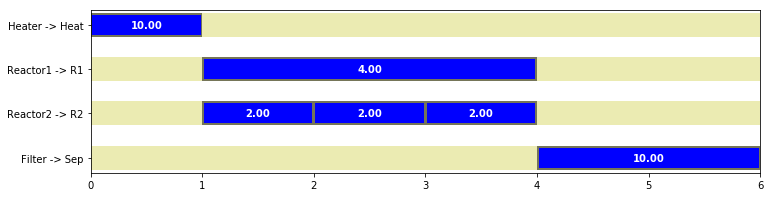

In [4]:
stn.gantt()

In [5]:
stn.trace()


Starting Conditions

    Initial State Inventories are:
        hA             0.0 kg
        IB             0.0 kg
        A            100.0 kg
        B              0.0 kg

Time = 0 hr

    1. Assign Heater to Heat for 10.00 kg batch for 1.0 hours
    2. Transfer 10.00 from A to Heater

    State Inventories are now:
        hA             0.0 kg
        IB             0.0 kg
        A             90.0 kg
        B              0.0 kg

    Unit Assignments are now:
        Filter is unassigned
        Reactor1 is unassigned
        Heater on Heat with 10.00 kg batch for hour 1 of 1
        Reactor2 is unassigned

Time = 1 hr

    1. Transfer 10.00 kg from Heater to hA
    2. Assign Reactor1 to R1 for 4.00 kg batch for 3.0 hours
    3. Transfer 4.00 from hA to Reactor1
    4. Release Heater from Heat
    5. Assign Reactor2 to R2 for 2.00 kg batch for 1.0 hours
    6. Transfer 2.00 from hA to Reactor2

    State Inventories are now:
        hA             4.0 kg
        IB          